Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance',
       'Own_No', 'Own_Yes', 'Student_No', 'Student_Yes', 'Married_No',
       'Married_Yes', 'Region_East', 'Region_South', 'Region_West'],
      dtype='object')


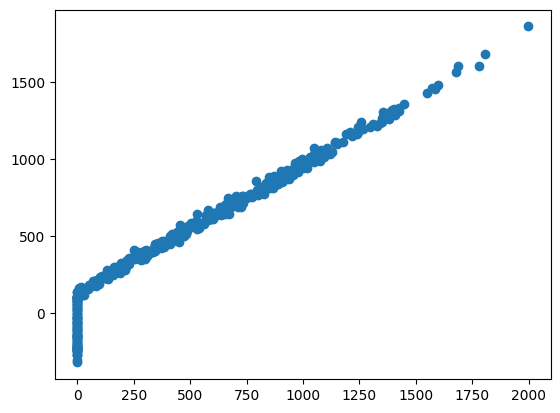

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


df = pd.read_csv('~/Downloads/Credit.csv')
df = pd.get_dummies(df)
print(df.columns)

for col in df.columns:
    if '_' in col:
        df[col] = df[col].astype(int)
df
model = LinearRegression()

columns = ['Limit', 'Income', 'Rating', 'Cards', 'Age', 'Education', 'Own_No', 'Own_Yes', 'Student_No', 'Student_Yes',
          'Married_No', 'Married_Yes', 'Region_East', 'Region_South', 'Region_West']

X = df[['Limit', 'Income', 'Rating', 'Cards', 'Age', 'Education', 'Own_No', 'Own_Yes', 'Student_No', 'Student_Yes',
        'Married_No', 'Married_Yes', 'Region_East', 'Region_South', 'Region_West']]
y = df['Balance']
X = StandardScaler().fit_transform(X)
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)
plt.scatter(y, preds)
plt.show()

In [22]:
import numpy as np

correlations = pd.DataFrame(np.corrcoef(df.loc[df['Balance'] > 0, columns + ['Balance']].values.T), 
                            index=columns+['Balance'], columns=columns+['Balance'])

In [23]:
correlations

,Limit,Income,Rating,Cards,Age,Education,Own_No,Own_Yes,Student_No,Student_Yes,Married_No,Married_Yes,Region_East,Region_South,Region_West,Balance
Limit,1.000000,0.833706,0.996091,-0.022540,0.164160,-0.031583,0.037479,-0.037479,0.128538,-0.128538,-0.027618,0.027618,0.032118,-0.034412,0.007660,0.795757
Income,0.833706,1.000000,0.830651,-0.040318,0.227115,-0.032540,0.021187,-0.021187,0.018829,-0.018829,-0.035209,0.035209,0.050538,-0.043412,-0.000537,0.414373
Rating,0.996091,0.830651,1.000000,0.024991,0.167269,-0.040466,0.035413,-0.035413,0.122168,-0.122168,-0.034104,0.034104,0.030544,-0.031207,0.005503,0.798441
Cards,-0.022540,-0.040318,0.024991,1.000000,0.020615,-0.087351,0.011200,-0.011200,0.026456,-0.026456,0.001775,-0.001775,-0.019562,0.002309,0.017205,0.074416
Age,0.164160,0.227115,0.167269,0.020615,1.000000,0.023899,-0.010058,0.010058,0.023400,-0.023400,0.022040,-0.022040,0.058262,-0.032730,-0.020925,0.008343
Education,-0.031583,-0.032540,-0.040466,-0.087351,0.023899,1.000000,0.010611,-0.010611,-0.077099,0.077099,-0.083458,0.083458,-0.037620,-0.032785,0.076741,0.001001
Own_No,0.037479,0.021187,0.035413,0.011200,-0.010058,0.010611,1.000000,-1.000000,0.063201,-0.063201,0.010738,-0.010738,0.052385,-0.011681,-0.039627,0.017192
Own_Yes,-0.037479,-0.021187,-0.035413,-0.011200,0.010058,-0.010611,-1.000000,1.000000,-0.063201,0.063201,-0.010738,0.010738,-0.052385,0.011681,0.039627,-0.017192
Student_No,0.128538,0.018829,0.122168,0.026456,0.023400,-0.077099,0.063201,-0.063201,1.000000,-1.000000,-0.103269,0.103269,-0.004194,0.075446,-0.084205,-0.209602
Student_Yes,-0.128538,-0.018829,-0.122168,-0.026456,-0.023400,0.077099,-0.063201,0.063201,-1.000000,1.000000,0.103269,-0.103269,0.004194,-0.075446,0.084205,0.209602


In [20]:
from sklearn.metrics import mean_absolute_error


for column in columns:
    X = df[[col for col in columns if col != column]]
    y = df['Balance']
    
    X = StandardScaler().fit_transform(X)
    model = LinearRegression()
    model.fit(X, y)
    preds = model.predict(X)
    mae = mean_absolute_error(preds, y)

    fig = plt.figure()
    fig.suptitle(column)
    #plt.scatter(y, preds)
    #plt.show()
    
    print(f'{column}: {mae}')

Limit: 82.30325456393771
Income: 152.29140625
Rating: 78.24639832427503
Cards: 79.84905092532635
Age: 77.8591729306955
Education: 77.9175383055526
Own_No: 79.02751326887508
Own_Yes: 79.02751326887508
Student_No: 77.83757386560131
Student_Yes: 77.8375738656012
Married_No: 77.8375738656012
Married_Yes: 77.83757386560116
Region_East: 77.83757386560126
Region_South: 77.83757386560129
Region_West: 77.83757386560126


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>